# TUGAS TELCO CHURN

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


melihat berapa baris dan kolom 

In [2]:
data.shape

(7043, 21)

Melihat info masing masing coloum yang memuat null dan data typenya

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# CHECK MISSING VALUES


Menghitung berapa null yang berada di dalam tabel telcochurn

In [4]:
data.isna().sum() # BISA DILIHAT TIDAK ADA NULL VALUES

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

DARI DTYPES YANG BISA DILIHAT KITA TAU NIH DIBAGIAN TOTAL CHARGES ISI ANGKA TETAPI DI DTYPES BERISI OBJECT DAN INI HARUS DI UBAH

In [6]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce') # Membuat tipe data yang ada didalam object totalcharges ' ' menjadi NAN agar bisa diubah menjadi float.
data['TotalCharges'] = data['TotalCharges'].astype(float)

MENGHTITUNG KEMBALI ISNULLNYA

In [7]:
data.isna().sum() # MENGHTIUNG KEMBALI ISNA DAN SUM NYA 

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Ngedrop Nilai Null karena jika kita menggunakan mean,median,dll maka kita merubah nilai suatu data.

In [8]:
df_drop = data.dropna()
df_drop.info() # DAN BISA KITA LIHAT NILAI TOTAL CHARGE MENJADI FLOAT

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


# CATEGORICAL DATA ENCODER

Merubah Kolom menjadi angka agar kita bisa menganalisis

In [9]:
data = df_drop.iloc[:,1:]
data = pd.get_dummies(data) #Menjadikan semua kolom menjadi encoder label 
data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,1,0,0,1,0,0,0,1,1,0
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,1,0,0,1,0,1,0,0,1,0
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,0,0,0,1,0,0,1,0,1,0
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,0,0,0,1,0,0,0,1,0,1


In [10]:
# Perbandingan jika location customer id tidak di drop maka 
ifdata = pd.get_dummies(df_drop) 
ifdata

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108.15,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,1840.75,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,151.65,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0
7039,0,72,103.20,7362.90,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
7040,0,11,29.60,346.45,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
7041,1,4,74.40,306.60,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1


# ANOMALI DAN OUTLIERS DATA

Menghitung berapa baris yang berada di colom customer id

In [11]:
len(df_drop['customerID'].value_counts())

7032

#### Mencari Outliers pada typedata object

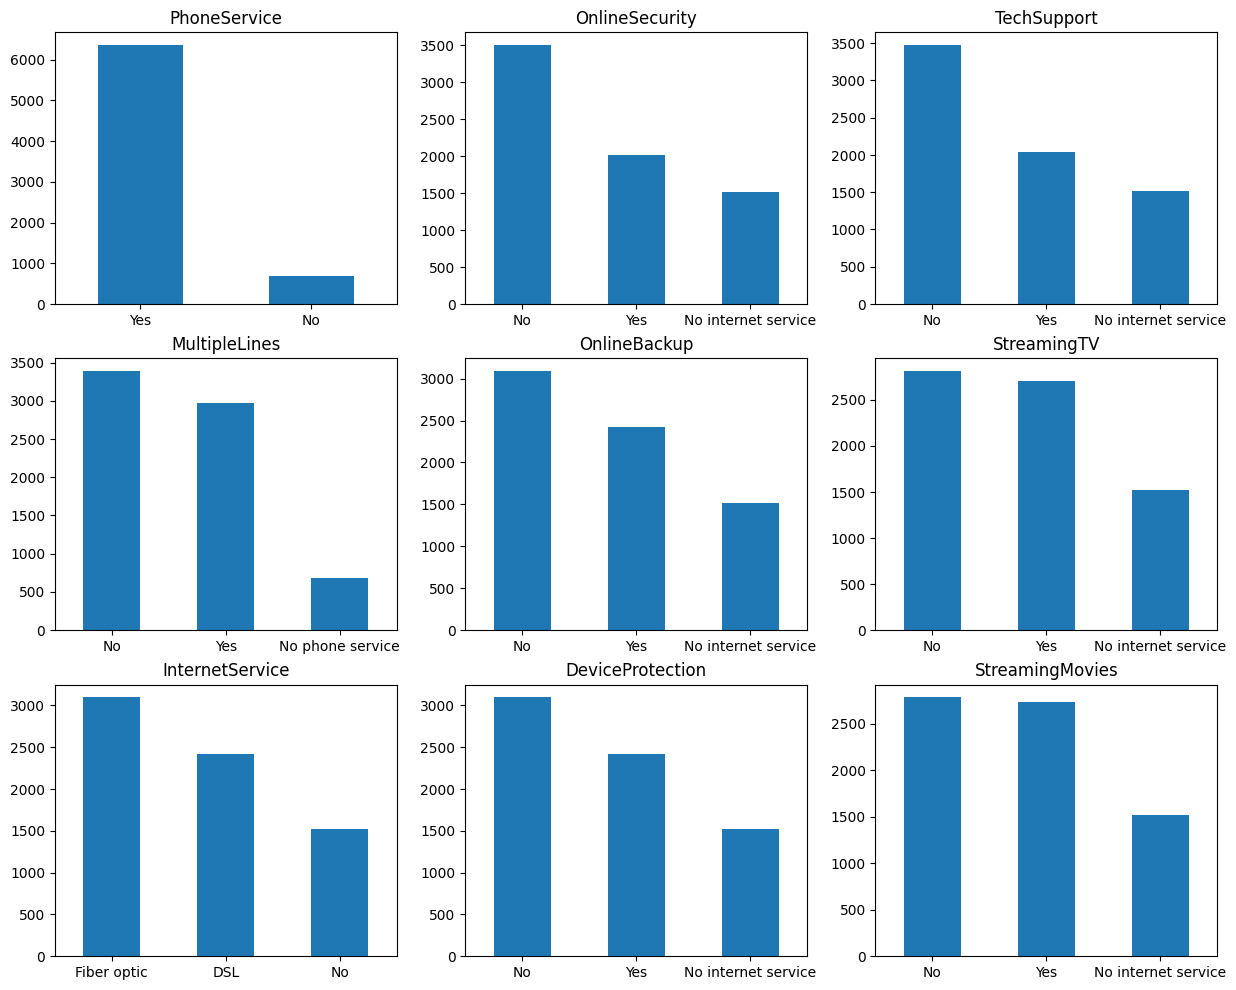

In [12]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df_drop[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >= 3 and i < 6:
        ax = df_drop[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = df_drop[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

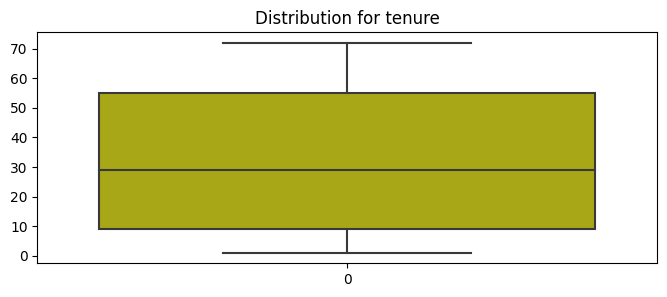

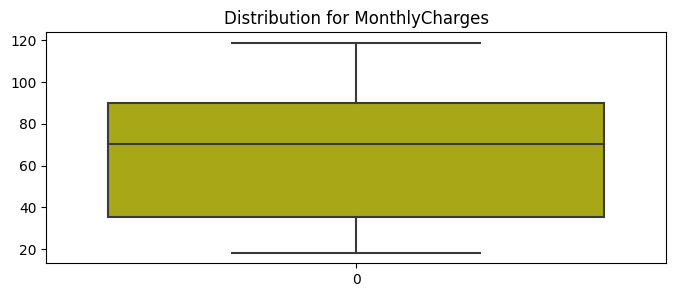

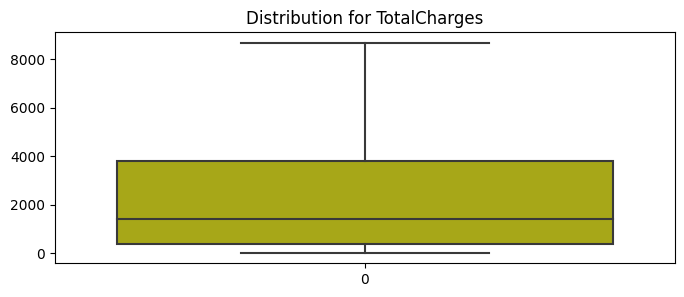

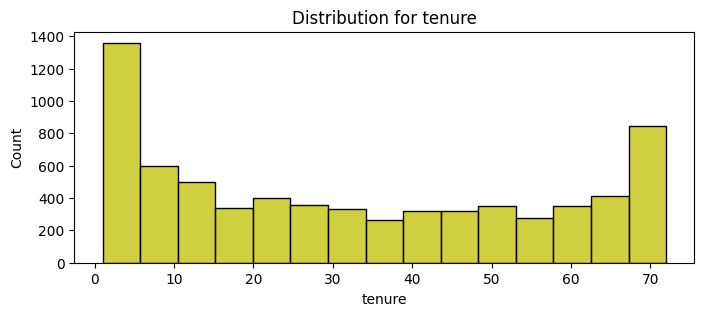

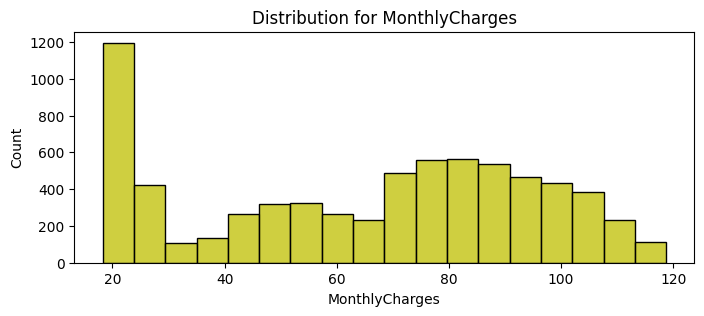

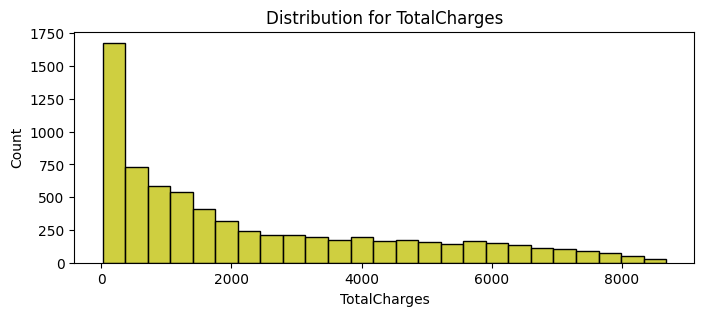

In [13]:
number_col = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feat in number_col: 
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feat))
    ax = sns.boxplot(df_drop[feat], color= 'y')
    plt.show()

for feat in number_col: 
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feat))
    ax = sns.histplot(df_drop[feat], color= 'y')
    plt.show()
